Problem:
You are given a dataset containing information about customers of an online retail store. Each data point represents a customer and consists of the following features:

Age (numeric)
Annual Income (numeric)
Spending Score (numeric)
The target variable is whether the customer made a purchase (1 for yes, 0 for no).

Your task is to:

- Load the dataset and split it into training and testing sets.
- Train a KNN classifier on the training data.
- Make predictions on the test data.
- Evaluate the performance of the classifier using appropriate metrics.

Instructions:
- Load the dataset online_retail.csv.
- Split the dataset into features (X) and target variable (y).
- Split the data into training and testing sets using a 70-30 split.
- Initialize a KNN classifier with n_neighbors=5.
- Train the classifier on the training data.
- Make predictions on the test data.
- Evaluate the classifier's performance using accuracy, precision, recall, and F1-score.
- Visualize the confusion matrix.

Note: Make sure to handle any missing values appropriately and preprocess the data as needed before training the classifier.

Dataset: 
- Age, Annual Income, SpendingScore, Purchased
- 22, 20000, 40, 0
- 35, 70000, 60, 1
- 45, 80000, 30, 1
- 30, 60000, 70, 1
- 55, 150000, 90, 0
- 50, 120000, 80, 0

In [1]:
# check for missing data (none)
# turn the numbers into a pandas dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [24]:
data = {'Age':[44,11,33,45,31,22,23,45,78,66,73,30,18,21,37,19,28,48,49,38,37,69,89,20,17,25],
            'Annual Income':[40000,10000,300000,4000,20000,60000,2000,800,7000,60000,200000,30000000,40000,4000,4000,10000,200,500000,5000,5000,3000000,2000,1000000,700000,9000,80000],
            'Spending Score':[40,10,30,40,20,60,20,80,70,60,20,30,40,40,40,10,20,50,50,50,30,20,10,70,90,80],
            'Purchased':[0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,1,1,1,1,1,1,0,0,1,0,1]}

df = pd.DataFrame(data)

In [25]:
df

,Age,Annual Income,Spending Score,Purchased
0,44,40000,40,0
1,11,10000,10,1
2,33,300000,30,1
3,45,4000,40,1
4,31,20000,20,0
5,22,60000,60,0
6,23,2000,20,1
7,45,800,80,0
8,78,7000,70,0
9,66,60000,60,1


In [26]:
from sklearn.model_selection import train_test_split

X = df.drop('Purchased',axis=1)
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train,y_train)
predictions_5 = knn_5.predict(X_test)

C:\Users\raiu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [28]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions_5))
print(confusion_matrix(y_test,predictions_5))

              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.50      0.75      0.60         4

    accuracy                           0.50         8
   macro avg       0.50      0.50      0.47         8
weighted avg       0.50      0.50      0.47         8

[[1 3]
 [1 3]]


In [30]:
error_rate = []

for i in range (1,15):
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_train,y_train)
    predictions_i = knn_i.predict(X_test)
    error_rate.append(np.mean(predictions_i != y_test))
print(error_rate)

[0.5, 0.625, 0.5, 0.5, 0.5, 0.5, 0.75, 0.625, 0.375, 0.625, 0.5, 0.625, 0.375, 0.5]


C:\Users\raiu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\raiu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

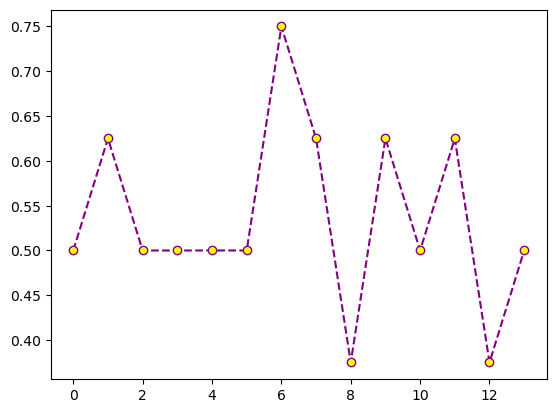

In [31]:
plt.plot(error_rate, marker='o',linestyle='dashed',color='purple',markerfacecolor='yellow')


In [34]:
knn_8 = KNeighborsClassifier(n_neighbors=8)
knn_8.fit(X_train,y_train)
predictions_8 = knn_8.predict(X_test)


C:\Users\raiu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [35]:
print('K=8')
print(classification_report(y_test,predictions_8))
print(confusion_matrix(y_test,predictions_8))

# the result of this is probably because I didn't scale down the datapoints

K=8
              precision    recall  f1-score   support

           0       0.43      0.75      0.55         4
           1       0.00      0.00      0.00         4

    accuracy                           0.38         8
   macro avg       0.21      0.38      0.27         8
weighted avg       0.21      0.38      0.27         8

[[3 1]
 [4 0]]


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [40]:
scaler.fit(df.drop('Purchased',axis=1))

scaled_features = scaler.transform(df.drop('Purchased',axis=1))
scaled_features

array([[ 0.24011333, -0.23409852, -0.06741999],
       [-1.36939634, -0.23931215, -1.38210972],
       [-0.29638989, -0.18891376, -0.5056499 ],
       [ 0.28888635, -0.24035487, -0.06741999],
       [-0.39393593, -0.23757427, -0.94387981],
       [-0.83289311, -0.23062277,  0.80903983],
       [-0.78412009, -0.24070245, -0.94387981],
       [ 0.28888635, -0.240911  ,  1.68549966],
       [ 1.89839602, -0.23983351,  1.24726975],
       [ 1.31311977, -0.23062277,  0.80903983],
       [ 1.65453092, -0.20629251, -0.94387981],
       [-0.44270895,  4.97257667, -0.5056499 ],
       [-1.0279852 , -0.23409852, -0.06741999],
       [-0.88166613, -0.24035487, -0.06741999],
       [-0.10129781, -0.24035487, -0.06741999],
       [-0.97921217, -0.23931215, -1.38210972],
       [-0.54025499, -0.24101527, -0.94387981],
       [ 0.43520541, -0.15415625,  0.37080992],
       [ 0.48397843, -0.24018109,  0.37080992],
       [-0.05252479, -0.24018109,  0.37080992],
       [-0.10129781,  0.28031264, -0.505

In [46]:
scaled_features_df = pd.DataFrame(scaled_features,columns=df.columns[:-1])
scaled_features_df.head()

,Age,Annual Income,Spending Score
0,0.240113,-0.234099,-0.06742
1,-1.369396,-0.239312,-1.38211
2,-0.296390,-0.188914,-0.50565
3,0.288886,-0.240355,-0.06742
4,-0.393936,-0.237574,-0.94388


In [48]:
W = scaled_features_df
z = df['Purchased']

W_train, W_test, z_train, z_test = train_test_split(W,z,test_size=0.3,random_state=101)

# we already declared knn_8 above

knn_8.fit(W_train,z_train)
new_prediction_8 = knn_8.predict(W_test)

C:\Users\raiu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [49]:
# perform model eval

print("K=8, with standardized variables, and z_test is ground truth")
print(classification_report(z_test,new_prediction_8))
print('\n')
print(confusion_matrix(z_test,new_prediction_8))

# this performed the same as above, so standardizing variable does not improve the eval test or model performance, only helps 
# select a better "k" value 

K=8, with standardized variables, and z_test is ground truth
              precision    recall  f1-score   support

           0       0.43      0.75      0.55         4
           1       0.00      0.00      0.00         4

    accuracy                           0.38         8
   macro avg       0.21      0.38      0.27         8
weighted avg       0.21      0.38      0.27         8



[[3 1]
 [4 0]]


In [58]:
error_rate_2 = []

for i in range (1,19):
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(W_train,z_train)
    predictions_i = knn_i.predict(W_test)
    error_rate_2.append(np.mean(predictions_i != z_test))
print(error_rate_2)

[0.75, 0.625, 0.75, 0.625, 0.75, 0.875, 0.875, 0.625, 0.75, 0.5, 0.5, 0.625, 0.375, 0.25, 0.25, 0.25, 0.5, 0.5]


C:\Users\raiu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\raiu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Text(0, 0.5, 'Error Rate 2')

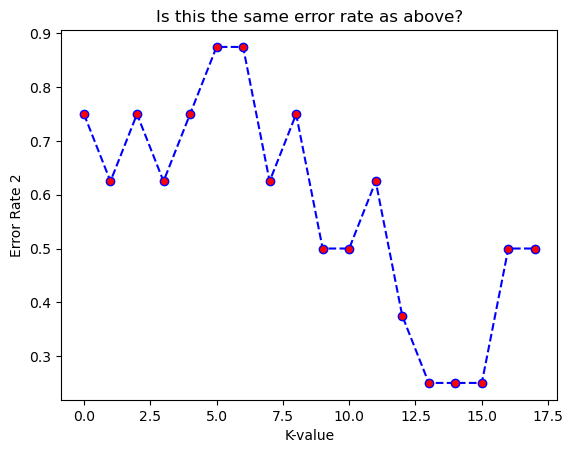

In [59]:
plt.plot(error_rate_2,marker='o',linestyle='dashed',markerfacecolor='red',color='blue')
plt.title('Is this the same error rate as above?')
plt.xlabel('K-value')
plt.ylabel('Error Rate 2')

In [62]:
print('This time we choose 13')

knn_13 = KNeighborsClassifier(n_neighbors=13)
knn_13.fit(W_train,z_train)
predictions_13 = knn_13.predict(W_test)

This time we choose 13


C:\Users\raiu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [63]:
print('let us evaluate at 13')
print(classification_report(z_test,predictions_13))
print(confusion_matrix(z_test,predictions_13))

# this time it's better than knn_13 but still not amazing

let us evaluate at 13
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.57      1.00      0.73         4

    accuracy                           0.62         8
   macro avg       0.79      0.62      0.56         8
weighted avg       0.79      0.62      0.56         8

[[1 3]
 [0 4]]
